In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import

* Both files contain the same table
* Working with xlsx file as datatypes are better suited for numerical columns

In [179]:
m = pd.read_csv('data/measurements.csv')
m2 = pd.read_excel('data/measurements2.xlsx')

In [180]:
m.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [181]:
m2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [182]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [183]:
m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [184]:
df = m2.copy()

## Data Understanding
### Every row represents a car trip:
* 'gas_type' is our target value, representing type of fuel used in each trip: SP95 E10 (cheaper ethanol mix) and SP98 (standard unleaded fuel)
* 'distance', 'consume', 'speed': trip metrics in km, L/100km and km/h
* 'temp_inside', 'temp_outside': temperature during trip in degrees Celsius
* 'specials', 'AC', 'rain', 'sun': information about weather conditions during each trip and also whether Air Conditioning was used (text values in 'specials' appear to be encoded into the other columns)
* 'refill liters', 'refill gas': for trips where the user refilled the tank in full, how many liters and which type of fuel

In [185]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

## Data Cleaning

* Large presence of Nan values in dataset
* preserving 'temp_inside' by filling in median values
* 'refill liters' and 'refill gas' - filling them with zero and 'none' as they represent trips where the user did not refill the tank.
* 'specials' - We can safely drop this column without losing information since it is encoded into binary columns 'AC', 'rain' and 'sun'. 
* Clean data exported to 'measurements_clean.csv'

In [186]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [187]:
df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].median())

In [188]:
df['refill liters'].fillna(0, inplace=True)

In [189]:
df['refill gas'].fillna('none', inplace=True)

In [190]:
df['specials'].value_counts() #30 total containing AC, 32 total cointaing SUN, 

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [191]:
df['AC'].value_counts() # matches 30 with AC

0    358
1     30
Name: AC, dtype: int64

In [192]:
df['sun'].value_counts() #matches 32 with SUN

0    356
1     32
Name: sun, dtype: int64

In [193]:
df['rain'].value_counts() #possibly combines snow and rain

0    340
1     48
Name: rain, dtype: int64

In [194]:
df.drop(['specials'], axis=1, inplace=True)

In [195]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.0,none
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.0,none
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.0,none
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.0,none
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.0,none
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.0,none
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.0,none
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.0,none


In [196]:
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [197]:
df.to_csv('data/measurements_clean.csv')

## Visualizations

#### Distribution of Target - 58.7% SP98 x 41.2% E10 - Data contains some imbalance

SP98    0.587629
E10     0.412371
Name: gas_type, dtype: float64


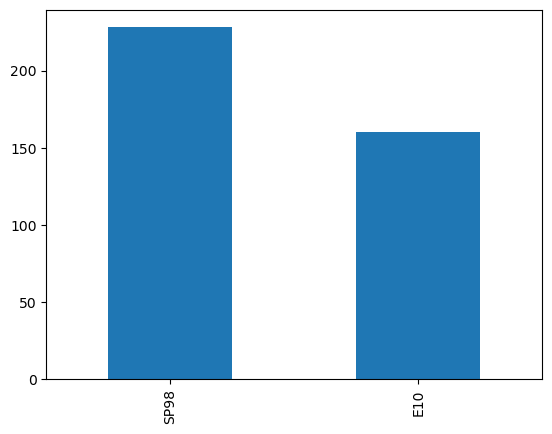

In [198]:
print(df['gas_type'].value_counts(normalize=True))
df['gas_type'].value_counts().plot(kind='bar')
plt.show()

### Distribution of Features:
* average speed per trip: ~40km/h - close to a normal distribution
* Most trips under a distance of 50km - presence of positive outliers (some trips up to 200km+)
* average fuel consumption at 5L/100km - distribuition skewed to the positive side (max values of 12L/100km)
* average outside temperature between 5 and 10 degrees Celsius - normal distribution
* most trips under regular clear weather (few examples of rain and sunny/hot days)

(array([ 13.,  63.,  64., 109.,  51.,  53.,  18.,   5.,   8.,   4.]),
 array([14. , 21.6, 29.2, 36.8, 44.4, 52. , 59.6, 67.2, 74.8, 82.4, 90. ]),
 <BarContainer object of 10 artists>)

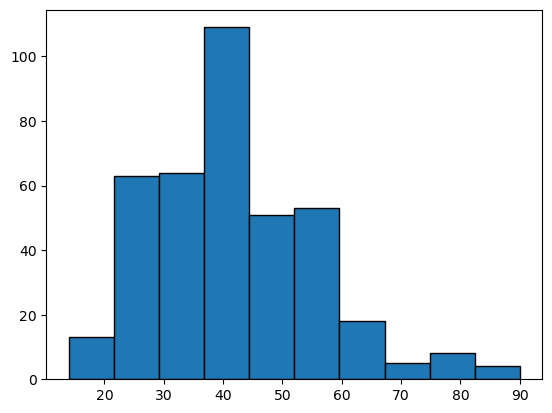

In [199]:
plt.hist(df['speed'],ec='black')

(array([311.,  59.,   7.,   2.,   3.,   1.,   1.,   2.,   0.,   2.]),
 array([  1.3 ,  22.78,  44.26,  65.74,  87.22, 108.7 , 130.18, 151.66,
        173.14, 194.62, 216.1 ]),
 <BarContainer object of 10 artists>)

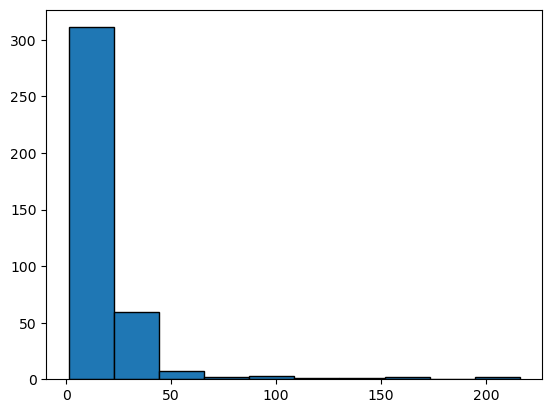

In [200]:
plt.hist(df['distance'],ec='black')

(array([ 75., 184.,  93.,  23.,   4.,   3.,   2.,   1.,   1.,   2.]),
 array([ 3.3 ,  4.19,  5.08,  5.97,  6.86,  7.75,  8.64,  9.53, 10.42,
        11.31, 12.2 ]),
 <BarContainer object of 10 artists>)

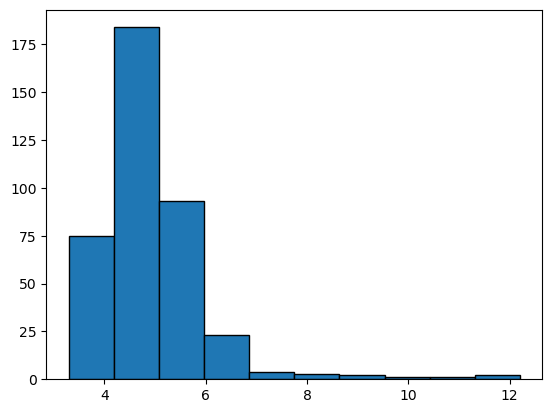

In [201]:
plt.hist(df['consume'],ec='black')

(array([  3.,  28.,  43., 100.,  68.,  57.,  43.,  19.,  19.,   8.]),
 array([-5. , -1.4,  2.2,  5.8,  9.4, 13. , 16.6, 20.2, 23.8, 27.4, 31. ]),
 <BarContainer object of 10 artists>)

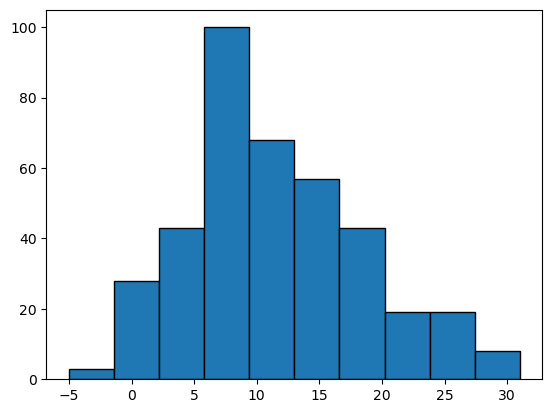

In [202]:
plt.hist(df['temp_outside'],ec='black')

(array([  1.,  25.,   4., 146., 114.,  59.,  15.,   3.,   7.,  14.]),
 array([19.  , 19.65, 20.3 , 20.95, 21.6 , 22.25, 22.9 , 23.55, 24.2 ,
        24.85, 25.5 ]),
 <BarContainer object of 10 artists>)

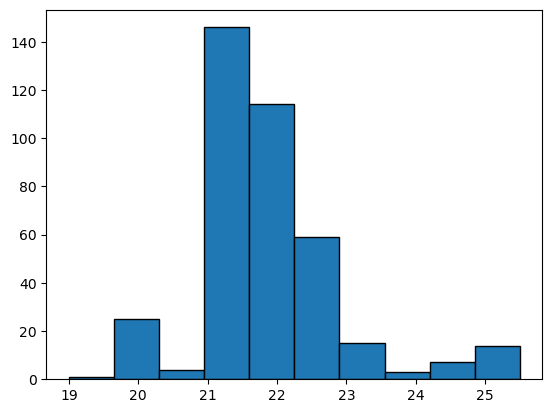

In [203]:
plt.hist(df['temp_inside'],ec='black')

0    0.92268
1    0.07732
Name: AC, dtype: float64


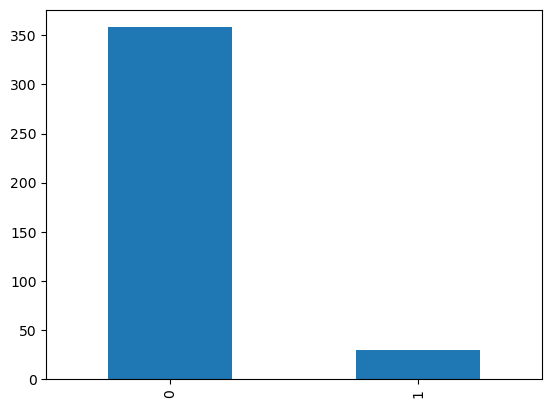

In [204]:
print(df['AC'].value_counts(normalize=True))
df['AC'].value_counts().plot(kind='bar')
plt.show()

0    0.876289
1    0.123711
Name: rain, dtype: float64


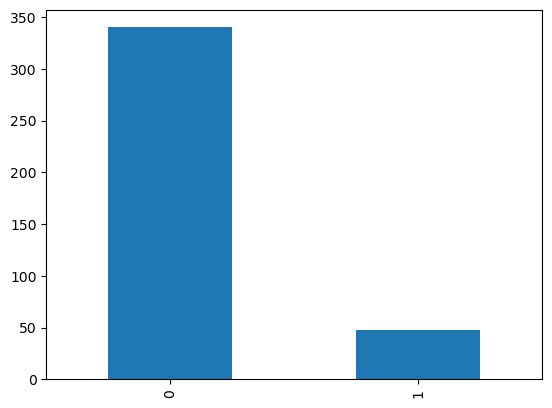

In [205]:
print(df['rain'].value_counts(normalize=True))
df['rain'].value_counts().plot(kind='bar')
plt.show()

0    0.917526
1    0.082474
Name: sun, dtype: float64


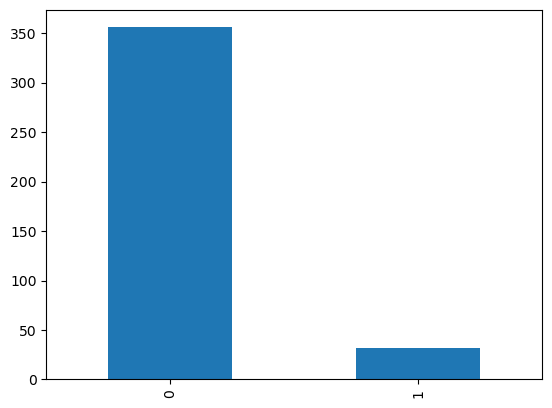

In [206]:
print(df['sun'].value_counts(normalize=True))
df['sun'].value_counts().plot(kind='bar')
plt.show()

none    0.966495
SP98    0.020619
E10     0.012887
Name: refill gas, dtype: float64


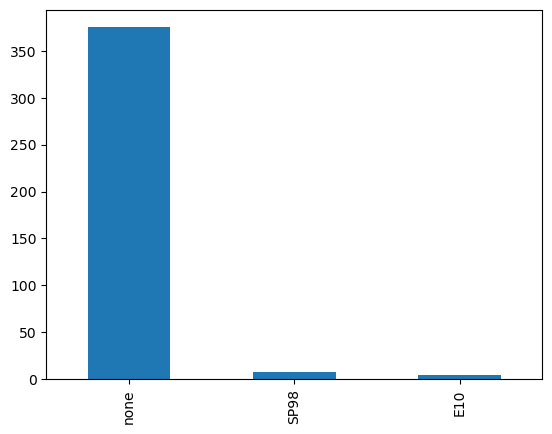

In [207]:
print(df['refill gas'].value_counts(normalize=True))
df['refill gas'].value_counts().plot(kind='bar')
plt.show()

(array([375.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   9.,   3.]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <BarContainer object of 10 artists>)

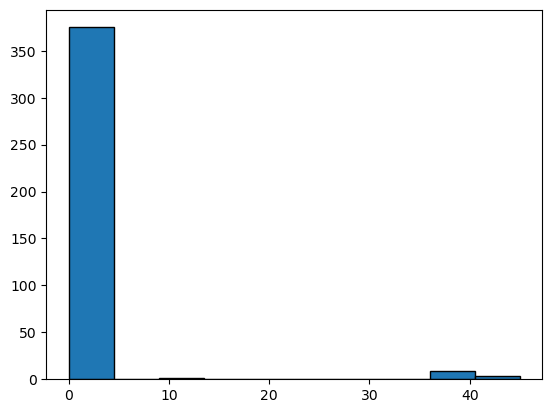

In [208]:
plt.hist(df['refill liters'],ec='black')

### Comparisons of Features and Target
* average consumption equally distributed by fuel type
* avg trip distance slighty higher for trips using E10 but mostly a balanced distribution
* avg speed slighty higher for trips using E10 but mostly a balanced distribution
* much higher number of trips registered with AC on and where it rained while using SP98 fuel.


<Axes: xlabel='gas_type', ylabel='consume'>

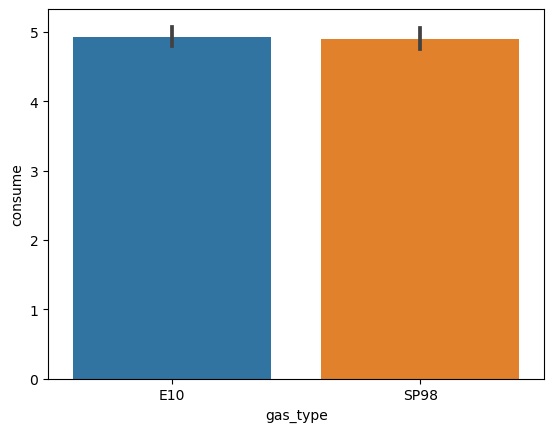

In [209]:
sns.barplot(x =df['gas_type'], y =df['consume'], data = df)

<Axes: xlabel='gas_type', ylabel='distance'>

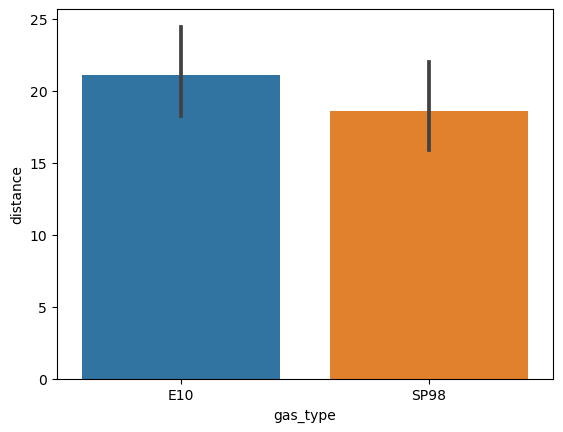

In [210]:
sns.barplot(x =df['gas_type'], y =df['distance'], data = df)

<Axes: xlabel='gas_type', ylabel='speed'>

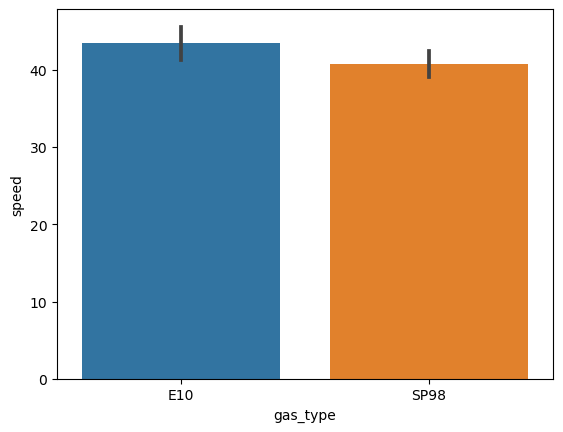

In [211]:
sns.barplot(x =df['gas_type'], y =df['speed'], data = df)

<Axes: xlabel='gas_type', ylabel='rain'>

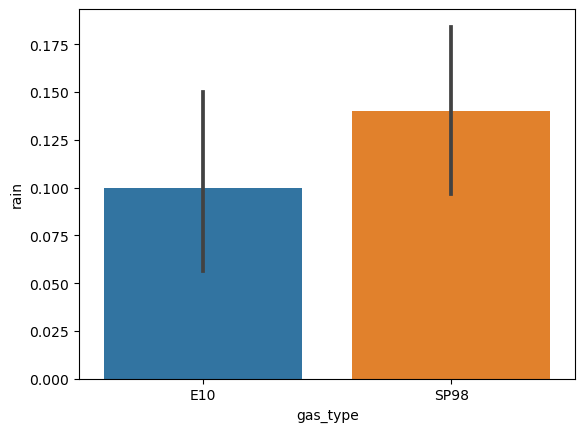

In [212]:
sns.barplot(x =df['gas_type'], y =df['rain'], data = df)

<Axes: xlabel='gas_type', ylabel='AC'>

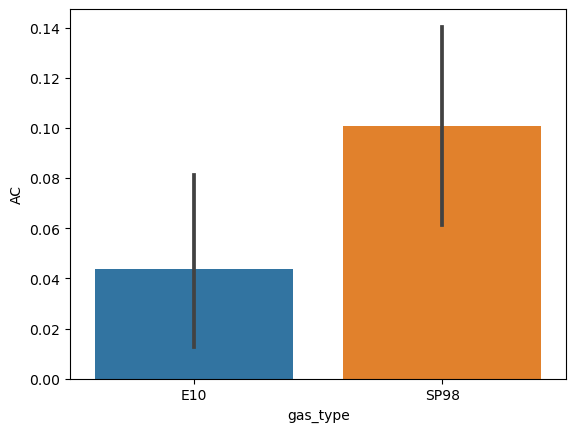

In [213]:
sns.barplot(x =df['gas_type'], y =df['AC'], data = df)

### Comparison of Features
* Slight increase in fuel comsumption for trips with AC on
* Significant increase in fuel comsumption for trips where it rained
* Some correlation between trips where it rained and the AC was turned on

<Axes: xlabel='AC', ylabel='consume'>

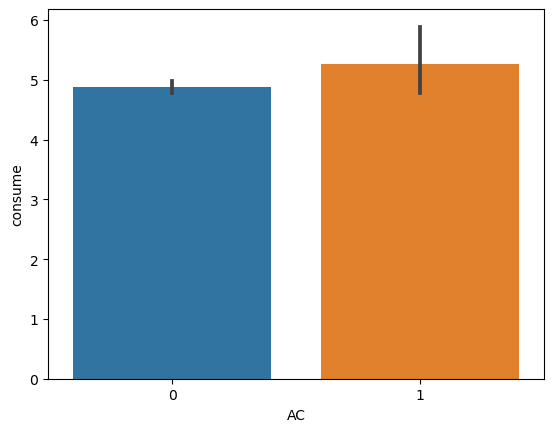

In [214]:
sns.barplot(x =df['AC'], y =df['consume'], data = df)

<Axes: xlabel='rain', ylabel='consume'>

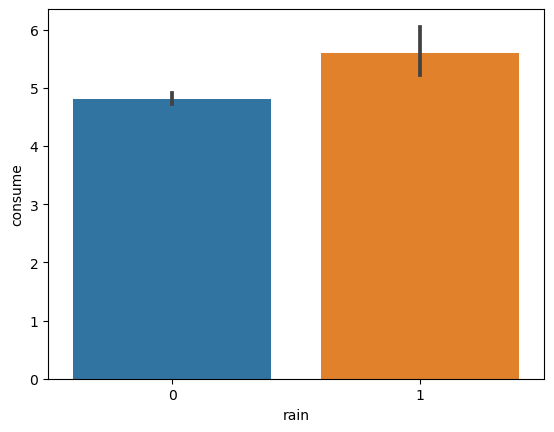

In [215]:
sns.barplot(x =df['rain'], y =df['consume'], data = df)

<Axes: xlabel='AC', ylabel='rain'>

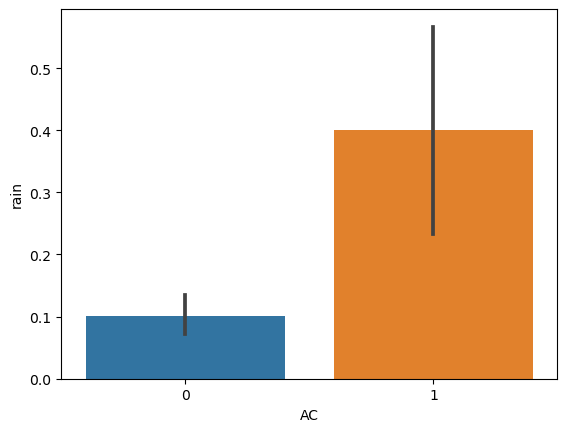

In [216]:
sns.barplot(x =df['AC'], y =df['rain'], data = df)

<Axes: xlabel='AC', ylabel='temp_outside'>

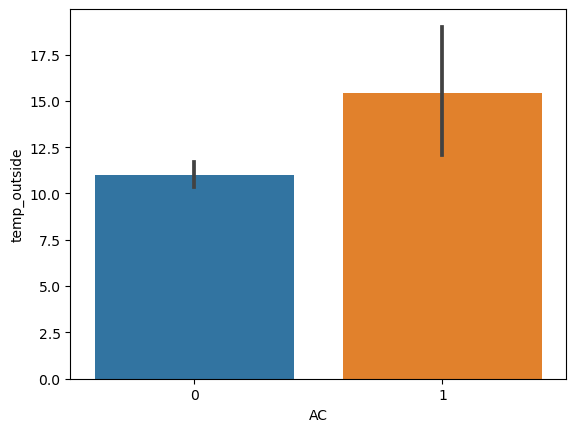

In [217]:
sns.barplot(x =df['AC'], y =df['temp_outside'], data = df)

In [219]:
df2 = df.copy()

In [222]:
df2 = df2[df2['AC'] == 0]

In [224]:
df2 = df2[df2['rain'] == 0]

<Axes: xlabel='gas_type', ylabel='consume'>

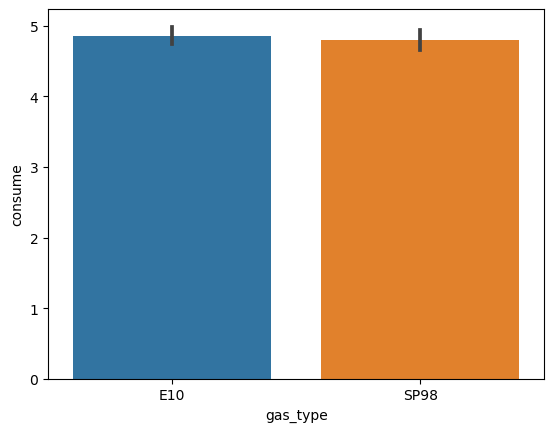

In [225]:
sns.barplot(x =df2['gas_type'], y =df2['consume'], data = df2)

## Observations

* Both fuel types show no significant difference in consumption between them
* Some correlation between higher fuel consumption and AC being on and rainy weather was observed, and most of these instances happened while using SP98 fuel. However excluding these values made no significant change to the overall consumption distribuition
* This dataset does not contain pricing information of the two fuel types. Considering no significant difference in fuel consumption, it can be assumed the advantage is in whichever fuel is the cheapest per liter.
* According to original data source, E10 ethanol mix seems to be the cheaper fuel to purchase per liter, hence being the better option.